In [1]:
import parc
import matplotlib.pyplot as plt

In [2]:
import scanpy as sc

In [3]:
adata = sc.read_csv("full_dataset_biexp_aligned.csv", first_column_names = True)

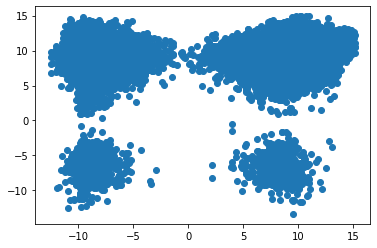

In [4]:
plt.scatter(adata.X[:,0],adata.X[:,1])

In [6]:
Parc1 = parc.PARC(adata.X)

In [7]:
Parc1.run_PARC()

input data has shape 197160 (samples) x 13 (features)
knn struct was not available, so making one
commencing local pruning based on Euclidean distance metric at 3 s.dev above mean
commencing global pruning
commencing community detection
partition type MVP
list of cluster labels and populations 363 [(0, 19338), (1, 10179), (2, 7711), (3, 6696), (4, 5958), (5, 5857), (6, 4379), (7, 4358), (8, 4169), (9, 3979), (10, 3776), (11, 3234), (12, 3202), (13, 2772), (14, 2636), (15, 2469), (16, 2119), (17, 1904), (18, 1771), (19, 1346), (20, 1275), (21, 1160), (22, 1134), (23, 1103), (24, 1090), (25, 1061), (26, 1052), (27, 1039), (28, 1032), (29, 1014), (30, 1001), (31, 987), (32, 984), (33, 922), (34, 857), (35, 834), (36, 820), (37, 806), (38, 786), (39, 771), (40, 770), (41, 763), (42, 758), (43, 708), (44, 707), (45, 700), (46, 675), (47, 661), (48, 655), (49, 644), (50, 640), (51, 623), (52, 600), (53, 597), (54, 594), (55, 581), (56, 580), (57, 565), (58, 558), (59, 548), (60, 543), (61, 5

In [8]:
parc_labels = Parc1.labels

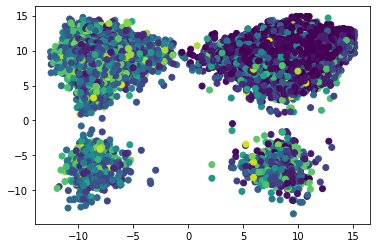

In [9]:
plt.scatter(adata.X[:, 0], adata.X[:, 1], c=parc_labels)

a,b, spread, dist 1.5769434603113077 0.8950608779109733 1.0 0.1
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


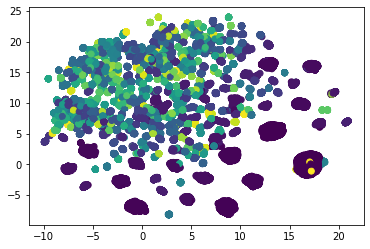

In [13]:
# Run umap on the HNSW knngraph already built in PARC (more time and memory efficient for large datasets)
Parc1.knn_struct = Parc1.make_knn_struct()
graph = Parc1.knngraph_full()
X_umap = Parc1.run_umap_hnsw(adata.X, graph)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=Parc1.labels)
plt.show()